<a href="https://colab.research.google.com/github/Shubhajaiswal/Safe-Socials/blob/main/youtube_comments_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install protobuf==3.19.0


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 7.5 MB/s 
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.17.3
    Uninstalling protobuf-3.17.3:
      Successfully uninstalled protobuf-3.17.3


In [2]:
pip install obsei dateparser

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 84 kB 2.3 MB/s 
     |████████████████████████████████| 288 kB 17.8 MB/s 
     |████████████████████████████████| 61 kB 9.1 MB/s 
     |████████████████████████████████| 93 kB 1.9 MB/s 
     |████████████████████████████████| 749 kB 48.5 MB/s 
     |████████████████████████████████| 81 kB 9.8 MB/s 
     |████████████████████████████████| 188 kB 50.5 MB/s 
     |████████████████████████████████| 96 kB 6.7 MB/s 
     |████████████████████████████████| 50 kB 7.2 MB/s 
     |████████████████████████████████| 4.4 MB 37.4 MB/s 
     |████████████████████████████████| 776.3 MB 17 kB/s 
     |████████████████████████████████| 503 kB 50.7 MB/s 
     |████████████████████████████████| 133 kB 47.4 MB/s 
     |████████████████████████████████| 188 kB 51.7 MB/s 
     |████████████████████████████████| 96 kB 6.4 MB/s 
     |████████████████████████████████| 150 k

In [3]:
import logging
import sys

In [5]:


from obsei.analyzer.classification_analyzer import (
    ClassificationAnalyzerConfig, ZeroShotClassificationAnalyzer)
from obsei.source.youtube_scrapper import (YoutubeScrapperConfig,
                                           YoutubeScrapperSource)


In [6]:
logger = logging.getLogger(__name__)
logging.basicConfig(stream=sys.stdout, level=logging.INFO)

In [22]:
video_url = 'https://www.youtube.com/watch?v=LDeQryJewvw'

In [23]:
source_config = YoutubeScrapperConfig(
    video_url= video_url,
    fetch_replies=False,
    max_comments=20,
    lookup_period="1Y",
)

In [24]:
source = YoutubeScrapperSource()

source_response_list = source.lookup(source_config)

In [25]:
for idx, source_response in enumerate(source_response_list):
    print(f"source_response#'{idx}'='{source_response.__dict__}'")

source_response#'0'='{'segmented_data': {}, 'meta': {'comment_id': 'UgxQMp4_YuHwF7_G6_R4AaABAg', 'text': 'If you guys are liked this video or it helps you to get Motivated. Please share our videos. our goal is to Motivate you and Become the best version of yourself.!✊', 'time': datetime.datetime(2021, 9, 4, 4, 32, 34, 178453, tzinfo=datetime.timezone.utc), 'author': 'Inspire Planet', 'channel': 'UCquHnO0NVjlLjM2frMo574w', 'votes': '142', 'photo': 'https://yt3.ggpht.com/lhAzgQhA482gk6JM9VKB7ANtPqhX1p5zc77oaUjUZghuY9TAGK1le0bmMjHpy7KFIgnXma_Kyew=s176-c-k-c0x00ffffff-no-rj', 'heart': True}, 'source_name': 'YoutubeScrapper', 'processed_text': 'If you guys are liked this video or it helps you to get Motivated. Please share our videos. our goal is to Motivate you and Become the best version of yourself.!✊'}'
source_response#'1'='{'segmented_data': {}, 'meta': {'comment_id': 'UgzR4RnKGjkYPHpYX294AaABAg', 'text': 'Excellent My friend Sunder. I know personally as your senior in Madras. You are 

In [26]:
text_analyzer = ZeroShotClassificationAnalyzer(
    model_name_or_path="typeform/mobilebert-uncased-mnli", device="auto"
)

In [27]:
analyzer_response_list = text_analyzer.analyze_input(
    source_response_list=source_response_list,
    analyzer_config=ClassificationAnalyzerConfig(
        labels=["positive", "negative"],
    ),
)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [28]:
for idx, an_response in enumerate(analyzer_response_list):
    print(f"analyzer_response#'{idx}'='{an_response.__dict__}'")

analyzer_response#'0'='{'segmented_data': {'classifier_data': {'positive': 0.8382436037063599, 'negative': 0.0004055546596646309}}, 'meta': {'comment_id': 'UgxQMp4_YuHwF7_G6_R4AaABAg', 'text': 'If you guys are liked this video or it helps you to get Motivated. Please share our videos. our goal is to Motivate you and Become the best version of yourself.!✊', 'time': datetime.datetime(2021, 9, 4, 4, 32, 34, 178453, tzinfo=datetime.timezone.utc), 'author': 'Inspire Planet', 'channel': 'UCquHnO0NVjlLjM2frMo574w', 'votes': '142', 'photo': 'https://yt3.ggpht.com/lhAzgQhA482gk6JM9VKB7ANtPqhX1p5zc77oaUjUZghuY9TAGK1le0bmMjHpy7KFIgnXma_Kyew=s176-c-k-c0x00ffffff-no-rj', 'heart': True}, 'source_name': 'YoutubeScrapper', 'processed_text': 'If you guys are liked this video or it helps you to get Motivated. Please share our videos. our goal is to Motivate you and Become the best version of yourself.!✊'}'
analyzer_response#'1'='{'segmented_data': {'classifier_data': {'positive': 0.9943424463272095, 'ne

In [29]:
from pandas import DataFrame
from obsei.sink.pandas_sink import PandasSink, PandasSinkConfig

sink_config = PandasSinkConfig(
   dataframe=DataFrame()
)
sink = PandasSink()

In [30]:
dataframe = sink.send_data(analyzer_response_list, sink_config)

In [31]:
dataframe

,processed_text,segmented_data_classifier_data_positive,segmented_data_classifier_data_negative,meta_comment_id,meta_text,meta_time,meta_author,meta_channel,meta_votes,meta_photo,meta_heart,source_name
0,If you guys are liked this video or it helps y...,0.84,0.00,UgxQMp4_YuHwF7_G6_R4AaABAg,If you guys are liked this video or it helps y...,2021-09-04 04:32:34.178453+00:00,Inspire Planet,UCquHnO0NVjlLjM2frMo574w,142,https://yt3.ggpht.com/lhAzgQhA482gk6JM9VKB7ANt...,True,YoutubeScrapper
1,Excellent My friend Sunder. I know personally ...,0.99,0.00,UgzR4RnKGjkYPHpYX294AaABAg,Excellent My friend Sunder. I know personally ...,2021-12-04 04:32:34.183009+00:00,Bhaskar CEO Kollu Family Travel Channel,UCsgpfng0re5HUvGMG5Y5slA,690,https://yt3.ggpht.com/o3zjcN2nhAmJPBXyi9Lcw70P...,True,YoutubeScrapper
2,He was not poor. This was the life for all mid...,1.00,0.00,UgwuQWZcOJEV8-2tORB4AaABAg,He was not poor. This was the life for all mid...,2022-07-04 04:32:34.187172+00:00,Debashish Bhattacharjee,UCSOd9EGkRDLAZZTRxdXnsoQ,74,https://yt3.ggpht.com/ytc/AMLnZu-Vz9PmDgnTw0gC...,True,YoutubeScrapper
3,You are an inspiration for generations to come...,0.99,0.00,UgxB9oMaippE-NJtYnt4AaABAg,You are an inspiration for generations to come...,2022-05-04 04:32:34.191361+00:00,Doris Tejada,UCeRDkYugkIiJpZIu0F-1zvQ,91,https://yt3.ggpht.com/ytc/AMLnZu8Zbt-_tKOmB2R_...,True,YoutubeScrapper
4,"His words are truly inspiring.\nIn my case, I ...",0.78,0.07,UgwaXmOxP1LquNra-3h4AaABAg,"His words are truly inspiring.\nIn my case, I ...",2022-06-04 04:32:34.195526+00:00,Gayathri,UCtRd5cApF-QqzhfX9_xHJ9A,65,https://yt3.ggpht.com/ytc/AMLnZu-n9VI2PahXFyVW...,True,YoutubeScrapper
5,Truly inspirational. His vision propelled him ...,1.00,0.00,UgwuEcPav3DB9guSk3J4AaABAg,Truly inspirational. His vision propelled him ...,2022-08-04 04:32:34.199635+00:00,Nili Ghosh,UCo3A-tGKhASwbvcOgEyTAYw,2,https://yt3.ggpht.com/ytc/AMLnZu9rOo5SYcUIvVFI...,True,YoutubeScrapper
6,Very humble intelligent decent talk. I have lo...,0.99,0.00,UgxZk-mcTt0UmU_KULF4AaABAg,Very humble intelligent decent talk. I have lo...,2022-06-04 04:32:34.203667+00:00,Kasturi Goswami,UCDvorXGT9gCu47yMHSwAKNg,13,https://yt3.ggpht.com/ytc/AMLnZu8MLVGQKk7nLxwe...,True,YoutubeScrapper
7,You have exhibited the talent and we are prou...,1.00,0.00,UgxoREf4fvf25Z4BiRF4AaABAg,You have exhibited the talent and we are prou...,2022-08-04 04:32:34.207652+00:00,vijayakumar k,UCU4w9-wE7mUhRr1nIoXm5zw,2,https://yt3.ggpht.com/ytc/AMLnZu_nHE5iB_4IXswe...,False,YoutubeScrapper
8,I think it is your parents who should take the...,0.73,0.00,UgytlchgOZ2xU0OUTDV4AaABAg,I think it is your parents who should take the...,2022-08-04 04:32:34.211900+00:00,Suresh Sukumaran,UCVD5nNfEBf2BUexX6TDLcaQ,0,https://yt3.ggpht.com/ytc/AMLnZu-QcHuF5MBq34p-...,False,YoutubeScrapper
9,No doubt you are walking with forth right fort...,0.99,0.00,UgzH0Z7pEuKYoZ6f_S14AaABAg,No doubt you are walking with forth right fort...,2022-08-04 04:32:34.216058+00:00,Selvaraj Kannan,UCEfSOZ3V2KEsYcvZ6Pu_EGg,0,https://yt3.ggpht.com/ytc/AMLnZu-4Y2B2R_3XQkgc...,False,YoutubeScrapper


In [32]:
import pandas as pd

In [33]:
dataframe.loc[dataframe['segmented_data_classifier_data_negative'].astype('float')>0.5]

,processed_text,segmented_data_classifier_data_positive,segmented_data_classifier_data_negative,meta_comment_id,meta_text,meta_time,meta_author,meta_channel,meta_votes,meta_photo,meta_heart,source_name


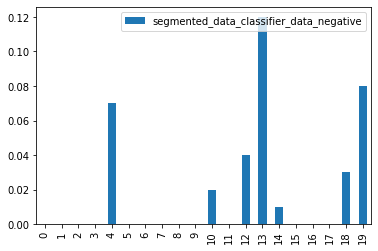

In [34]:
dataframe[['segmented_data_classifier_data_negative']].astype('float').plot.bar()